In [1]:
#코로나 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='NanumGothic')
    #Malgun 
%matplotlib inline

corona = pd.read_csv('../data2/covid_seoul.csv', engine='python')

In [2]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83138 entries, 0 to 83137
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      83138 non-null  int64  
 1   확진일     83138 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      83138 non-null  object 
 6   여행력     1619 non-null   object 
 7   접촉력     83138 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      83138 non-null  object 
 10  이동경로    0 non-null      float64
 11  등록일     83138 non-null  object 
 12  수정일     83138 non-null  object 
 13  노출여부    83138 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 8.9+ MB


In [3]:
corona.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,83138,2021-09-06,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-09-07 10:51,2021-09-07 10:51,Y
1,83137,2021-09-06,NaN,NaN,NaN,강남구,NaN,감염경로 조사중,NaN,-,NaN,2021-09-07 10:51,2021-09-07 10:51,Y
2,83136,2021-09-06,NaN,NaN,NaN,동작구,NaN,감염경로 조사중,NaN,-,NaN,2021-09-07 10:51,2021-09-07 10:51,Y
3,83135,2021-09-06,NaN,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-09-07 10:51,2021-09-07 10:51,Y
4,83134,2021-09-06,NaN,NaN,NaN,광진구,미국,해외유입,NaN,-,NaN,2021-09-07 10:51,2021-09-07 10:51,Y


In [4]:
# 확진일만 필요해
corona_df = corona[['확진일']]

In [5]:
# 짝대기 빼버리기
corona_df['확진일'] = corona_df['확진일'].str.replace('-','')

<ipython-input-5-b88a1ef288ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona_df['확진일'] = corona_df['확진일'].str.replace('-','')


In [6]:
corona_df.head()

,확진일
0,20210906
1,20210906
2,20210906
3,20210906
4,20210906


In [7]:
# 총 데이터가 확진자 수임
# 월별로 확진자수가 필요한데,,,,
# 아니면 년도별로?
corona_df.iloc[1]

확진일    20210906
Name: 1, dtype: object

In [8]:
#맨뒤 일은 빼도된다.
for i in range(len(corona_df['확진일'])):
    tmp = corona_df.iloc[i].values[0]
    corona_df.iloc[i] = tmp[:-2]
    
    

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\anaconda\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [9]:
corona_df

,확진일
0,202109
1,202109
2,202109
3,202109
4,202109
...,...
83133,202001
83134,202001
83135,202001
83136,202001


In [10]:
# 하지만 확진일이 필요한게 아님,,, 인원수가 필요하기 때문에 딕셔너리를 써서 다시 만들어보자
num = {}
for i in corona_df['확진일']:
    if i not in num:
        num[i] = 1
    else:
        num[i] += 1
num

{'202109': 3121,
 '202108': 15194,
 '202107': 14504,
 '202106': 6258,
 '202105': 6030,
 '202104': 5803,
 '202103': 3897,
 '202012': 10432,
 '202102': 4060,
 '202101': 4878,
 '202011': 2904,
 '202008': 2415,
 '202010': 733,
 '202009': 1306,
 '202007': 281,
 '202006': 459,
 '202005': 229,
 '202004': 156,
 '202003': 391,
 '202002': 80,
 '202001': 7}

In [11]:
corona_df2 = pd.DataFrame(num, index=[0])
corona_df2 = corona_df2.transpose()
corona_df2.reset_index(inplace=True)

In [12]:
corona_df2.head()

,index,0
0,202109,3121
1,202108,15194
2,202107,14504
3,202106,6258
4,202105,6030


In [13]:
corona_df2.columns = ['날짜','확진자수']

In [14]:
corona_df2 = corona_df2.sort_values('날짜',ascending=False)


In [15]:
corona_df2.reset_index(inplace=True)

In [16]:
corona_df2

,index,날짜,확진자수
0,0,202109,3121
1,1,202108,15194
2,2,202107,14504
3,3,202106,6258
4,4,202105,6030
5,5,202104,5803
6,6,202103,3897
7,8,202102,4060
8,9,202101,4878
9,7,202012,10432


In [17]:
corona_df2 = corona_df2.drop('index',axis=1)

In [18]:
corona_df2 = corona_df2[3:-1]

In [19]:
corona_df2.reset_index(inplace=True)

In [20]:
corona_df2 = corona_df2.drop('index',axis=1)

In [21]:
corona_df2

,날짜,확진자수
0,202106,6258
1,202105,6030
2,202104,5803
3,202103,3897
4,202102,4060
5,202101,4878
6,202012,10432
7,202011,2904
8,202010,733
9,202009,1306


### 자전거

In [22]:
b1 = pd.read_csv('../data2/서울특별시 공공자전거 일별 대여건수_20190601_20191130.csv')
b2 = pd.read_csv('../data2/서울특별시 공공자전거 일별 대여건수_2019.12.01_2020.05.31.csv')
b3 = pd.read_csv('../data2/서울특별시 공공자전거 일별 대여건수_2020.07.01_2021.01.31.csv')
b4 = pd.read_csv('../data2/서울특별시 공공자전거 일별 대여건수_21.02.01_21.06.30.csv')

In [23]:
b1['대여일시'] = b1['대여일시'].str.replace('-','')
b2['대여일시'] = b2['대여일시'].str.replace('-','')
b2['대여건수'] = b2['대여건수'].str.replace(' ','')
b2['대여건수'] = b2['대여건수'].str.replace(',','')
b3['대여일시'] = b3['대여일시'].str.replace('-','')
b3['대여건수'] = b3['대여건수'].str.replace(',','')
b4['대여일시'] = b4['대여일시'].str.replace('-','')
b4['대여건수'] = b4['대여건수'].str.replace(',','')

bike = pd.concat([b1, b2, b3, b4], ignore_index=True)
bike

,대여일시,대여건수
0,20190601,79878
1,20190602,77091
2,20190603,82911
3,20190604,83576
4,20190605,81515
...,...,...
873,20210626,105813
874,20210627,92869
875,20210628,106378
876,20210629,111907


In [24]:
for i in range(len(bike['대여일시'])):
    tmp = bike.iloc[i].values[0]
    bike.loc[i,'대여일시'] = tmp[:-2]

In [25]:
bike['대여일시'] = bike['대여일시'].astype(int)
bike['대여건수'] = bike['대여건수'].astype(int)

In [26]:
num = {}
for idx, k in enumerate(bike['대여일시']):
    if k not in num:
        num[k] = bike.iloc[idx].values[1]
    else:
        num[k] += bike.iloc[idx].values[1]
num

{201906: 2293879,
 201907: 3955405,
 201908: 4202368,
 201909: 4168444,
 201910: 4872802,
 201911: 3074538,
 201912: 882078,
 202001: 794162,
 202002: 762274,
 202003: 1533535,
 202004: 2157390,
 202005: 2480330,
 202006: 2770858,
 202007: 95705,
 202008: 1733973,
 202009: 2811990,
 202010: 2891618,
 202011: 1990070,
 202012: 1196309,
 202101: 812021,
 202102: 1234546,
 202103: 2184228,
 202104: 3043238,
 202105: 2950150,
 202106: 3460407}

In [27]:
bike.columns=['날짜','대여건수']

In [28]:
bike = pd.DataFrame(num, index=[0])
bike = bike.transpose()
bike.reset_index(inplace=True)

In [29]:
bike = bike.sort_values(by=['날짜'],ascending=False)

KeyError: '날짜'

In [30]:
bike.reset_index(inplace=True)
bike

,level_0,index,0
0,0,201906,2293879
1,1,201907,3955405
2,2,201908,4202368
3,3,201909,4168444
4,4,201910,4872802
5,5,201911,3074538
6,6,201912,882078
7,7,202001,794162
8,8,202002,762274
9,9,202003,1533535


In [31]:
bike.drop('index',axis=1,inplace=True)
bike

,level_0,0
0,0,2293879
1,1,3955405
2,2,4202368
3,3,4168444
4,4,4872802
5,5,3074538
6,6,882078
7,7,794162
8,8,762274
9,9,1533535


In [32]:
bike.columns = ['날짜','대여건수']

In [33]:
bike['날짜'] = bike['날짜'].astype(object)

In [34]:
all = pd.concat([bike,corona_df2],ignore_index=True,axis=1)

In [35]:
all = all.fillna(0)

In [36]:
all[3] = all[3].astype(int)

In [37]:
# all.drop(2,axis=1, inplace=True)

In [38]:
# all.columns = ['날짜','대여건수','확진자수']

In [39]:
all.drop(2,axis=1,inplace=True)

In [40]:
all.columns = ['날짜','대여건수','확진자수']

In [43]:
all

,날짜,대여건수,확진자수
0,0,2293879,6258
1,1,3955405,6030
2,2,4202368,5803
3,3,4168444,3897
4,4,4872802,4060
5,5,3074538,4878
6,6,882078,10432
7,7,794162,2904
8,8,762274,733
9,9,1533535,1306


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['Nanu

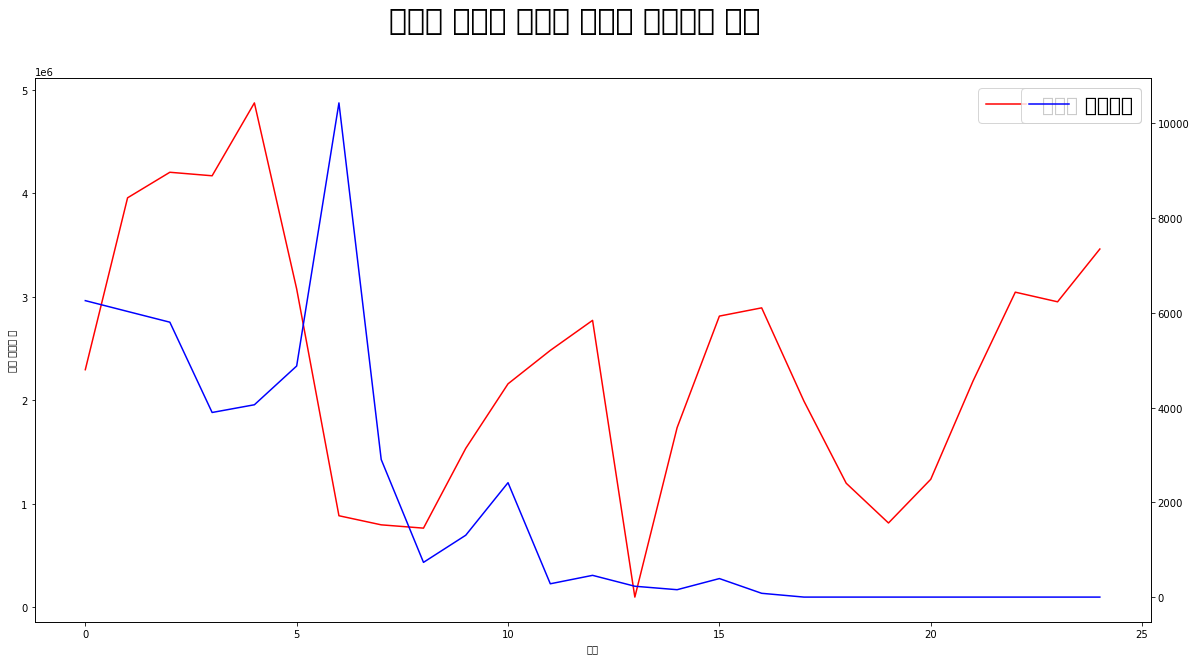

<Figure size 2160x1440 with 0 Axes>

In [45]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax1 = plt.subplots()
plt.figure(figsize=(30,20))
ax1.plot(all['날짜'], all['대여건수'], color='red', label='따릉이 이용건수')
ax2 = ax1.twinx()
ax2.plot(all['날짜'], all['확진자수'], color='blue', label='확진자수')
fig.suptitle('서울시 코로나 진행과 따릉이 이용건수 추이', fontsize=30)
ax1.set_xlabel('일자')
ax1.set_ylabel('이용건수')
ax1.set_ylabel('일별 확진자 수')
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
plt.show()